## R = 1:1, b = 0 kpc

In [1]:
from astropy.io import fits
hdul = fits.open("../../data/GalaxyClusterMergerCatalog/images/1to1/b0/fiducial_1to1_b0_hdf5_plt_cnt_0000_proj_z.fits")
hdul.info()

Filename: ../../data/GalaxyClusterMergerCatalog/images/1to1/b0/fiducial_1to1_b0_hdf5_plt_cnt_0000_proj_z.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  XRAY_EMISSIVITY    1 PrimaryHDU      38   (2048, 2048)   float64   
  1  SZ_KINETIC    1 ImageHDU        39   (2048, 2048)   float64   
  2  SZY           1 ImageHDU        39   (2048, 2048)   float64   
  3  TOTAL_DENSITY    1 ImageHDU        39   (2048, 2048)   float64   
  4  KT            1 ImageHDU        39   (2048, 2048)   float64   


In [2]:
from peakFinder_module import peakFind 

## Total Density

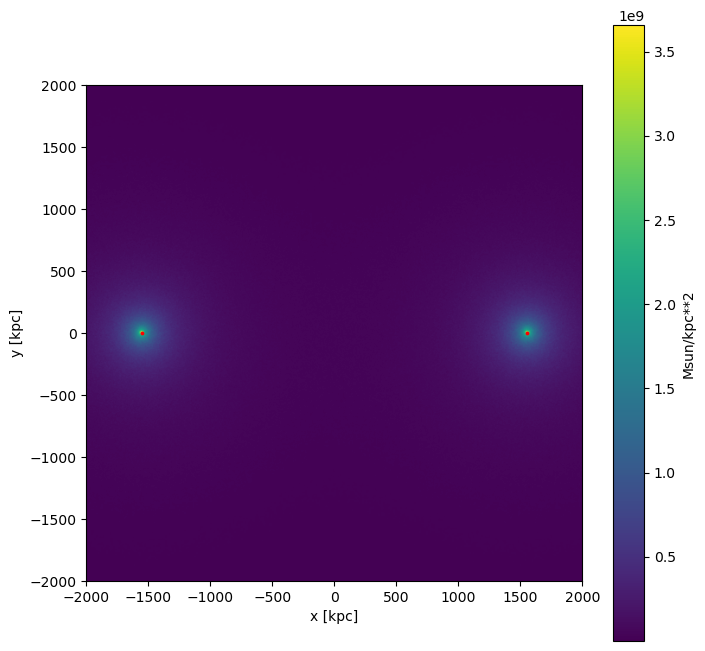

(x,y):  [(-1549.1811156787164, -3.4813058779297), (1549.1811156787164, 3.4813058779297)]
The distance between the brightest points is greater than 100 kpc.


In [3]:
file_path = "../../data/GalaxyClusterMergerCatalog/images/1to1/b0/fiducial_1to1_b0_hdf5_plt_cnt_0000_proj_z.fits"

# Extract the header and data from the FITS file
with fits.open(file_path) as hdul:
    if hdul[3].name == "TOTAL_DENSITY":
        i = 3
    else:
        raise ValueError("DENSITYがないよ")
    header = hdul[i].header
    data = hdul[i].data
    
peakFind(header, data)

## Xray_Emissivity

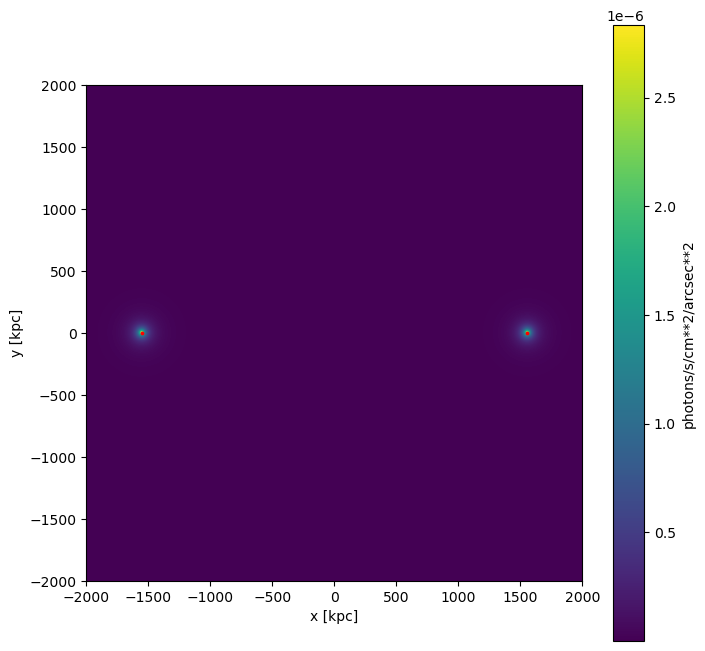

(x,y):  [(-1549.1811156787164, 3.4813058779297), (1549.1811156787164, 3.4813058779297)]
The distance between the brightest points is greater than 100 kpc.


In [4]:
file_path = "../../data/GalaxyClusterMergerCatalog/images/1to1/b0/fiducial_1to1_b0_hdf5_plt_cnt_0000_proj_z.fits"

# Extract the header and data from the FITS file
with fits.open(file_path) as hdul:
    if hdul[0].name == "XRAY_EMISSIVITY":
        i = 0
    else:
        raise ValueError("DENSITYがないよ")
    header = hdul[i].header
    data = hdul[i].data
    
peakFind(header, data)

## SZ effect -y

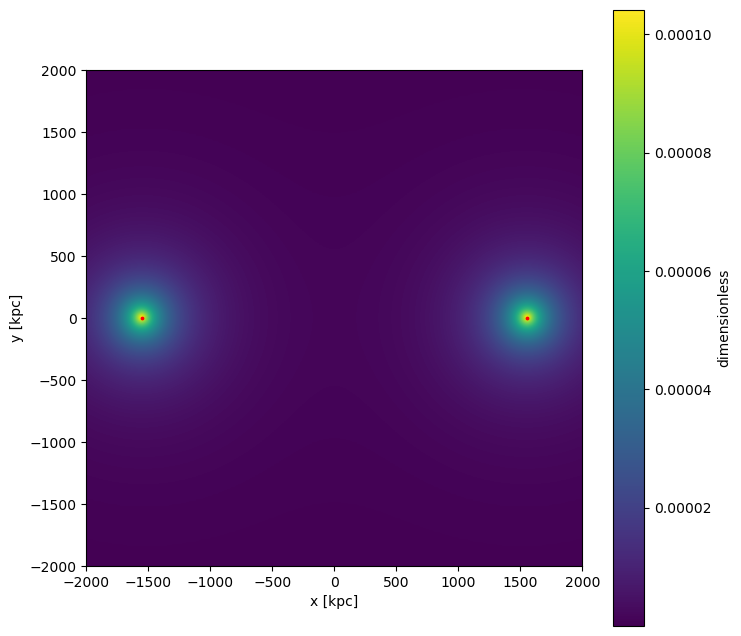

(x,y):  [(-1549.1811156787164, 3.4813058779297), (1549.1811156787164, 3.4813058779297)]
The distance between the brightest points is greater than 100 kpc.


In [5]:
file_path = "../../data/GalaxyClusterMergerCatalog/images/1to1/b0/fiducial_1to1_b0_hdf5_plt_cnt_0000_proj_z.fits"

# Extract the header and data from the FITS file
with fits.open(file_path) as hdul:
    if hdul[2].name == "SZY":
        i = 2
    else:
        raise ValueError("DENSITYがないよ")
    header = hdul[i].header
    data = hdul[i].data
    
peakFind(header, data)

In [ ]:
# import os
# import glob
# import matplotlib.pyplot as plt
# import numpy as np
# from astropy.io import fits
# from scipy.signal import find_peaks

# # Define the base directory
# base_dir = "../../data/GalaxyClusterMergerCatalog/images/1to1/b0/"

# # Find all relevant FITS files in the subdirectories
# fits_files = glob.glob(os.path.join(base_dir, '**', 'fiducial_1to1_b0_hdf5_plt_cnt_*_proj_z.fits'), recursive=True)

# # Extract directory names and sort files by directory name (numeric order)
# fits_files_sorted = sorted(fits_files, key=lambda x: int(os.path.basename(os.path.dirname(x))))

# # Loop over each FITS file and process it
# for file_path in fits_files_sorted:
#     # Extract the directory and timestep information
#     directory = os.path.basename(os.path.dirname(file_path))
#     try:
#         time_step = int(directory) / 100  # Adjusted to divide by 1000
#         time_output = f"{time_step * 2:.2f} Gyr"  # Multiply by 2 for the final output
#         print(f"Processing file: {file_path}")
#         print(f"Time: {time_output}")
#     except ValueError:
#         print(f"Skipping file: {file_path} (Invalid directory name)")
#         continue

#     # Extract the header and data from the FITS file
#     with fits.open(file_path) as hdul:
#         if hdul[3].name == "TOTAL_DENSITY":
#             i = 3
#         else:
#             raise ValueError("DENSITYがないよ")

#         header = hdul[i].header
#         data = hdul[i].data

#     # Extract relevant header information
#     cdelt1 = header['CDELT1']
#     cdelt2 = header['CDELT2']
#     crpix1 = header['CRPIX1']
#     crpix2 = header['CRPIX2']
#     cunit1 = header['CUNIT1']
#     cunit2 = header['CUNIT2']
#     bunit = header['BUNIT']

#     # Create the x and y axis values
#     x = (np.arange(data.shape[1]) - (crpix1 - 1)) * cdelt1
#     y = (np.arange(data.shape[0]) - (crpix2 - 1)) * cdelt2

#     # Find peaks in the entire data set
#     flattened_data = data.flatten()
#     peaks, _ = find_peaks(flattened_data, distance=10)  # Adjust distance as needed

#     if len(peaks) < 2:
#         print(f"Skipping file: {file_path} (Not enough peaks found)")
#         continue

#     # Get the coordinates of the peaks
#     peak_coords = [np.unravel_index(peak, data.shape) for peak in peaks]
#     peak_values = [flattened_data[peak] for peak in peaks]

#     # Separate peaks into left and right halves
#     left_peaks = [(coord, val) for coord, val in zip(peak_coords, peak_values) if coord[1] < data.shape[1] // 2]
#     right_peaks = [(coord, val) for coord, val in zip(peak_coords, peak_values) if coord[1] >= data.shape[1] // 2]

#     # Sort peaks by value and take the brightest from each side if they exist
#     brightest_points = []
#     if left_peaks:
#         brightest_points.append(sorted(left_peaks, key=lambda x: x[1])[-1][0])
#     if right_peaks:
#         brightest_points.append(sorted(right_peaks, key=lambda x: x[1])[-1][0])

#     # If only one peak was found, take the next brightest point
#     if len(brightest_points) < 2:
#         brightest_points.append(sorted(zip(peak_coords, peak_values), key=lambda x: x[1])[-2][0])

#     # Plot the data with the two brightest points marked
#     plt.figure(figsize=(8, 8))
#     plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
#     plt.colorbar(label=bunit)
#     plt.xlabel(f'x [{cunit1.strip()}]')
#     plt.ylabel(f'y [{cunit2.strip()}]')
#     plt.title(f'Density Distribution at {time_output}')

#     # Mark the two brightest points
#     for point in brightest_points:
#         plt.scatter(x[point[1]], y[point[0]], color='red', s=3)

#     plt.xlim(-2000, 2000)  # Set x-axis range
#     plt.ylim(-2000, 2000)  # Set y-axis range

#     plt.show()

#     # Calculate the distance between the two brightest points
#     distance = np.sqrt((x[brightest_points[0][1]] - x[brightest_points[1][1]])**2 + 
#                        (y[brightest_points[0][0]] - y[brightest_points[1][0]])**2)

#     # Print the coordinates of the brightest points
#     brightest_coords = [(x[point[1]], y[point[0]]) for point in brightest_points]
#     print("(x,y): ", brightest_coords)

#     # If the distance is within 50 kpc, show a zoomed-in view
#     if distance < 100:  # Adjust zoom range to 100 kpc for more focus
#         print("The distance between the brightest points is within 100 kpc.")
        
#         # Determine the center of the two points
#         center_x = (x[brightest_points[0][1]] + x[brightest_points[1][1]]) / 2
#         center_y = (y[brightest_points[0][0]] + y[brightest_points[1][0]]) / 2
        
#         # Determine the range for the zoomed-in view
#         zoom_range = 100  # 200 kpc diameter, so 100 kpc radius
#         x_min = center_x - zoom_range
#         x_max = center_x + zoom_range
#         y_min = center_y - zoom_range
#         y_max = center_y + zoom_range
        
#         # Plot the zoomed-in view
#         plt.figure(figsize=(8, 8))
#         plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
#         plt.colorbar(label=bunit)
#         plt.xlabel(f'x [{cunit1.strip()}]')
#         plt.ylabel(f'y [{cunit2.strip()}]')
#         plt.title(f'Zoomed-in Density Distribution at {time_output}')
        
#         # Mark the two brightest points
#         for point in brightest_points:
#             plt.scatter(x[point[1]], y[point[0]], color='red', s=5)
        
#         plt.xlim(x_min, x_max)
#         plt.ylim(y_min, y_max)
#         plt.show()
#     else:
#         print("The distance between the brightest points is greater than 100 kpc.")
